#Paso 1. Se abre el archivo y se estudia la informacion general

## Inicializacion

In [58]:
# Carga de librerias
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np

## Cargar Datos

In [59]:
df_games = pd.read_csv('/content/sample_data/games.csv')

In [60]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [61]:
print(df_games.head())

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


# Paso 2. Preparar los datos

## Reemplazar los nombres de las columnas

In [62]:
df_games.columns = df_games.columns.str.lower()

print(df_games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


## Conviertir los datos en los tipos de datos necesarios


In [63]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### year_of_release

Se convertira el tipo de dato 'float' en la columna 'year_of_realease' a tipo de dato 'int'. Para lograr esto, tambien fue necesario rellenar los valores nan con ceros.

In [64]:
df_games['year_of_release'] = df_games['year_of_release'].astype('Int64')

In [65]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


In [66]:
print(df_games[df_games['year_of_release'].isna()])

                                    name platform  year_of_release  \
183                      Madden NFL 2004      PS2             <NA>   
377                     FIFA Soccer 2004      PS2             <NA>   
456           LEGO Batman: The Videogame      Wii             <NA>   
475           wwe Smackdown vs. Raw 2006      PS2             <NA>   
609                       Space Invaders     2600             <NA>   
...                                  ...      ...              ...   
16373  PDC World Championship Darts 2008      PSP             <NA>   
16405                      Freaky Flyers       GC             <NA>   
16448                          Inversion       PC             <NA>   
16458        Hakuouki: Shinsengumi Kitan      PS3             <NA>   
16522                       Virtua Quest       GC             <NA>   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
183          Sports      4.26      0.26      0.01         0.71          94.0   

### name

In [67]:
print(df_games[df_games['name'].isna()])

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN             1993   NaN      1.78      0.53      0.00   
14244  NaN      GEN             1993   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  


In [68]:
df_games= df_games.dropna(subset = 'name')


La información de la fila que tiene valores ausentes en la columna 'name', no es suficiente para ser considerada una fila relevante, por ende, es seguro eliminarlas.

In [69]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.5+ MB


### critic_score

In [70]:
#porcentaje de valores ausentes
print(df_games.isna().sum()/len(df_games)*100)

name                0.000000
platform            0.000000
year_of_release     1.609526
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.313349
user_score         40.082570
rating             40.471489
dtype: float64


In [71]:
# Cambio de tipo de dato de la columna 'critic_score' a Int64
df_games['critic_score'] = df_games['critic_score'].astype('Int64')
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(4), object(5)
memory usage: 1.6+ MB


### user_score

Los valores 'tbh', que, significan que aun no hay una calificacion para un juego sera tratado como un valor ausente, por ende reemplazado por nan.

In [72]:
df_games['user_score'] = df_games['user_score'].replace('tbd', np.nan)
df_games['user_score'] = df_games['user_score'].astype('float64')

In [73]:
print(df_games.isna().sum()/len(df_games)*100)

name                0.000000
platform            0.000000
year_of_release     1.609526
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.313349
user_score         54.586250
rating             40.471489
dtype: float64


El porcentaje de valores ausentes en las columnas 'critic_score' y 'user_score' es muy alto, poco más de la mitad de los datos, rellenarlos con valores estadísticos como la media o la mediana sesgaría el resultado de futuros análisis. Por esa razón, los valores ausentes se conservarán sin rellenar.

## Ventas totales

In [74]:
#nueva columna agregada con la suma todas las ventas locales
df_games['total_sales'] = df_games['eu_sales'] + df_games['jp_sales'] + df_games['na_sales'] +df_games['other_sales']

# Paso 3. Analizar los datos

## Juegos lanzados por año

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64


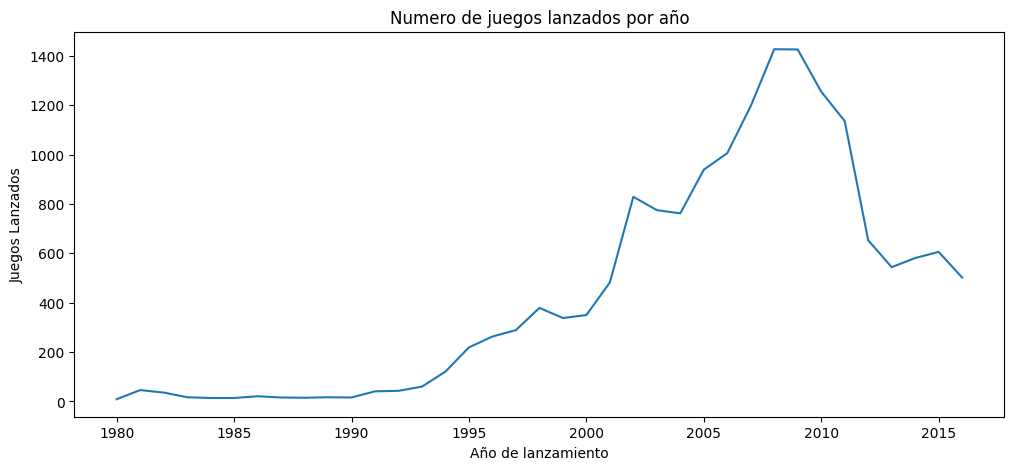

In [75]:
#agrupacion de juegos por año y conteo de titulos
print(df_games.groupby('year_of_release')['name'].count())

plt.figure(figsize=(12, 5))
df_games.groupby('year_of_release')['name'].count().plot()
plt.title('Numero de juegos lanzados por año')
plt.ylabel('Juegos Lanzados')
plt.xlabel('Año de lanzamiento')

plt.show()

Descartando los juegos donde no conocemos el año,  podemos ver un crecimiento inestable entre 1980 y 1993, año donde el número de videojuegos lanzados por año incrementa de manera más rápida y estable, lanzamientos que no dejan de crecer hasta que alcanzan un número máximo de lanzamientos en 2008 y entonces decrece el número de lanzamientos por año.

## Ventas por plataforma

In [76]:
top_6_platforms = df_games.groupby(['platform'])['total_sales'].sum().sort_values(ascending = False).head(6).keys().values
print('Las 6 plataformas mas populares:', top_6_platforms)


Las 6 plataformas mas populares: ['PS2' 'X360' 'PS3' 'Wii' 'DS' 'PS']


In [77]:
sales_per_platform_per_year = df_games.pivot_table(index = 'year_of_release',
                                    columns = 'platform',
                                    values = 'total_sales',
                                    aggfunc = 'sum').reset_index()
sales_per_platform_per_year = sales_per_platform_per_year[sales_per_platform_per_year['year_of_release'] != 0]
print(sales_per_platform_per_year)

platform  year_of_release   2600   3DO    3DS    DC      DS     GB    GBA  \
0                    1980  11.38   NaN    NaN   NaN     NaN    NaN    NaN   
1                    1981  35.68   NaN    NaN   NaN     NaN    NaN    NaN   
2                    1982  28.88   NaN    NaN   NaN     NaN    NaN    NaN   
3                    1983   5.84   NaN    NaN   NaN     NaN    NaN    NaN   
4                    1984   0.27   NaN    NaN   NaN     NaN    NaN    NaN   
5                    1985   0.45   NaN    NaN   NaN    0.02    NaN    NaN   
6                    1986   0.67   NaN    NaN   NaN     NaN    NaN    NaN   
7                    1987   1.94   NaN    NaN   NaN     NaN    NaN    NaN   
8                    1988   0.74   NaN    NaN   NaN     NaN   1.43    NaN   
9                    1989   0.63   NaN    NaN   NaN     NaN  64.97    NaN   
10                   1990    NaN   NaN    NaN   NaN     NaN   4.89    NaN   
11                   1991    NaN   NaN    NaN   NaN     NaN   5.57    NaN   

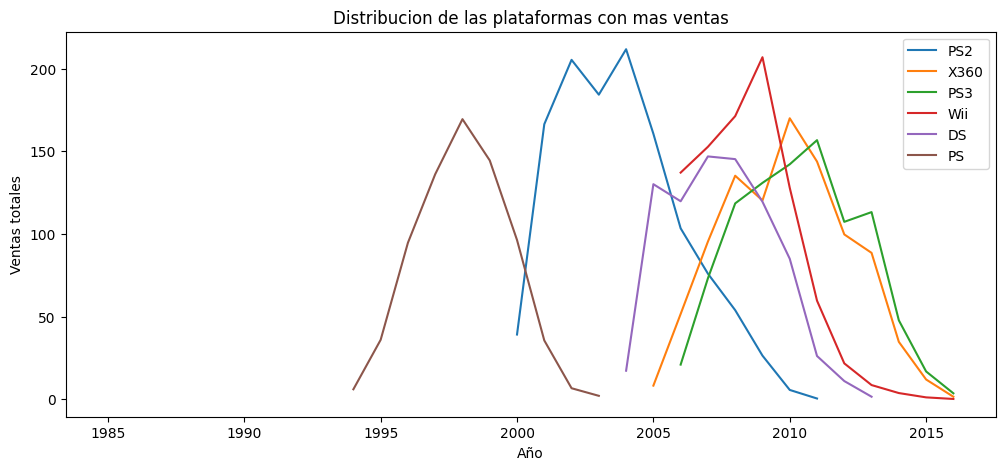

In [78]:
fig, ax = plt.subplots(figsize = (12, 5))


for value in top_6_platforms:
  ax.plot(sales_per_platform_per_year['year_of_release'], sales_per_platform_per_year[value], label = value)
ax.legend()
ax.set_title('Distribucion de las plataformas con mas ventas')
ax.set_ylabel('Ventas totales')
ax.set_xlabel('Año')


plt.show()

In [79]:
#Periodo activo de plataformas
print(len(sales_per_platform_per_year) - sales_per_platform_per_year.isna().sum())


platform
year_of_release    37
2600               10
3DO                 2
3DS                 6
DC                  7
DS                 11
GB                 13
GBA                 8
GC                  7
GEN                 5
GG                  1
N64                 7
NES                12
NG                  4
PC                 26
PCFX                1
PS                 10
PS2                12
PS3                11
PS4                 4
PSP                12
PSV                 6
SAT                 6
SCD                 2
SNES               10
TG16                1
WS                  3
Wii                11
WiiU                5
X360               12
XB                  9
XOne                4
dtype: int64


Con excepción de la PC, la mayoría de las plataformas modernas aparecen, llegan a un pico máximo de ventas y progresivamente decrecen sus ventas en un periodo promedio de 10-11 años.

## Periodo relevante para el analisis


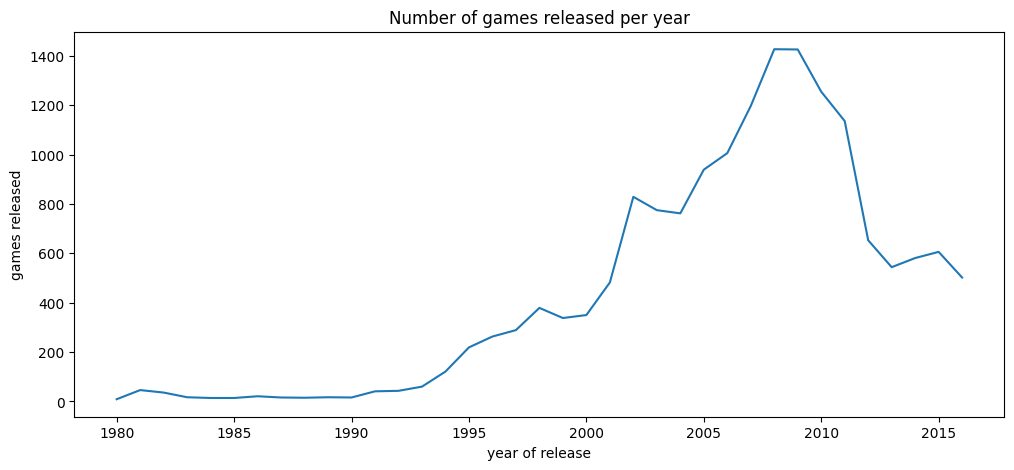

In [80]:
plt.figure(figsize=(12, 5))
df_games.groupby('year_of_release')['name'].count().plot()
plt.title('Number of games released per year')
plt.ylabel('games released')
plt.xlabel('year of release')

plt.show()

Tomando en cuenta la gráfica de arriba que muestra los juegos lanzados por año, usaremos el intervalo de tiempo de 2005 a 2016, en el año 2005 empieza a crecer rápidamente el número de lanzamientos por año, poco después alcanza el máximo en 2008 y a partir de dicho año decrementan los lanzamientos por año. Considero este intervalo relevante para poder encontrar patrones importantes entre las diferentes plataformas y teniendo en cuenta que las plataformas duran un promedio de 10-11 años con lanzamientos.

In [81]:
df_modern_games = df_games[df_games['year_of_release'] >= 2005]
df_modern_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11272 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             11272 non-null  object 
 1   platform         11272 non-null  object 
 2   year_of_release  11272 non-null  Int64  
 3   genre            11272 non-null  object 
 4   na_sales         11272 non-null  float64
 5   eu_sales         11272 non-null  float64
 6   jp_sales         11272 non-null  float64
 7   other_sales      11272 non-null  float64
 8   critic_score     5645 non-null   Int64  
 9   user_score       5538 non-null   float64
 10  rating           7310 non-null   object 
 11  total_sales      11272 non-null  float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 1.1+ MB


## Plataformas lideres en ventas

In [82]:
print(df_modern_games.groupby('platform')['total_sales'].sum().sort_values(ascending = False))

platform
X360    961.24
PS3     931.34
Wii     891.18
DS      785.49
PS2     426.46
PS4     314.14
PSP     282.47
3DS     257.81
PC      167.79
XOne    159.32
WiiU     82.19
XB       59.85
PSV      53.81
GBA      42.54
GC       39.15
DC        0.06
Name: total_sales, dtype: float64


In [83]:
modern_games_sales = df_modern_games.pivot_table(index = 'year_of_release',
                                    columns = 'platform',
                                    values = 'total_sales',
                                    aggfunc = 'sum').reset_index()
platfroms = modern_games_sales.keys().values[1:]
print(platfroms)


['3DS' 'DC' 'DS' 'GBA' 'GC' 'PC' 'PS2' 'PS3' 'PS4' 'PSP' 'PSV' 'Wii'
 'WiiU' 'X360' 'XB' 'XOne']


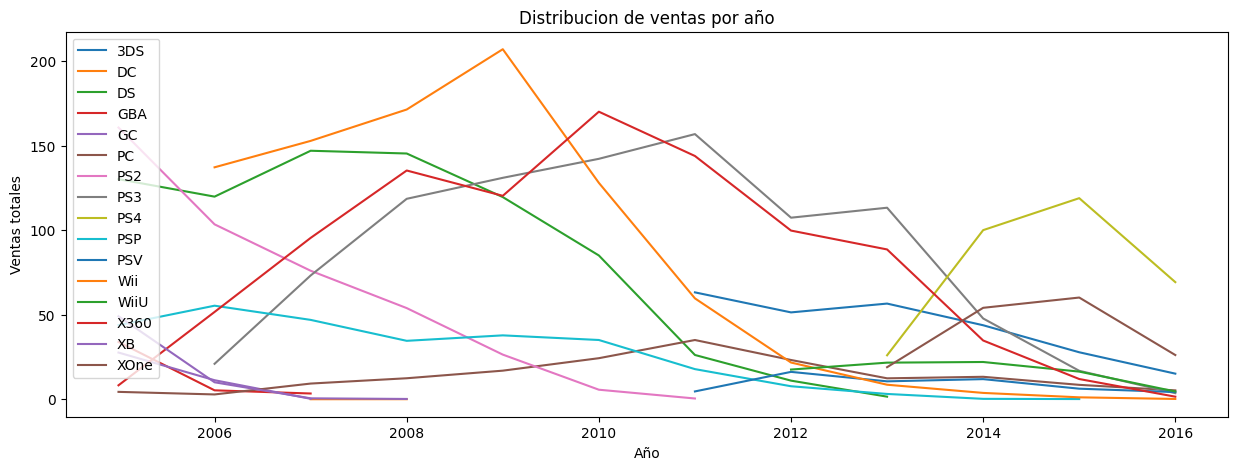

In [84]:
fig, ax = plt.subplots(figsize = (15, 5))

for platform in platfroms:
  ax.plot(modern_games_sales['year_of_release'], modern_games_sales[platform], label = platform)
ax.legend(loc='upper left')
ax.set_title('Distribucion de ventas por año')
ax.set_ylabel('Ventas totales')
ax.set_xlabel('Año')


plt.show()

Se observa cómo las ventas de todas las plataformas convergen hacia abajo en el 2016, tanta plataforma que están en el fin de su ciclo, como plataformas que van empezando. Sugiere que tal vez la recolección del 2016 es parcial, razón por la que reajustaremos el intervalo de años en el dataset y así considerar del 2005 al 2015.


In [85]:
df_modern_games.info()
df_modern_games = df_modern_games.drop(df_modern_games[df_modern_games['year_of_release']==2016].index.values)
df_modern_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11272 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             11272 non-null  object 
 1   platform         11272 non-null  object 
 2   year_of_release  11272 non-null  Int64  
 3   genre            11272 non-null  object 
 4   na_sales         11272 non-null  float64
 5   eu_sales         11272 non-null  float64
 6   jp_sales         11272 non-null  float64
 7   other_sales      11272 non-null  float64
 8   critic_score     5645 non-null   Int64  
 9   user_score       5538 non-null   float64
 10  rating           7310 non-null   object 
 11  total_sales      11272 non-null  float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 1.1+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 10770 entries, 0 to 16711
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  --

In [86]:
modern_games_sales = df_modern_games.pivot_table(index = 'year_of_release',
                                    columns = 'platform',
                                    values = 'total_sales',
                                    aggfunc = 'sum').reset_index()
platforms = modern_games_sales.keys().values[1:]
print(platforms)

['3DS' 'DC' 'DS' 'GBA' 'GC' 'PC' 'PS2' 'PS3' 'PS4' 'PSP' 'PSV' 'Wii'
 'WiiU' 'X360' 'XB' 'XOne']


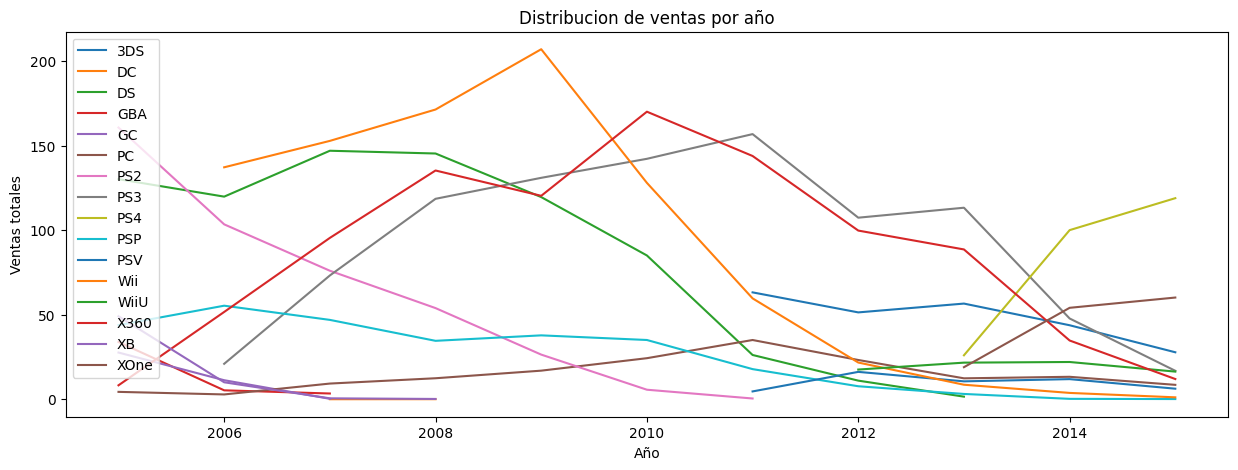

In [87]:
fig, ax = plt.subplots(figsize = (15, 5))

for platform in platforms:
  ax.plot(modern_games_sales['year_of_release'], modern_games_sales[platform], label = platform)
ax.legend(loc='upper left')
ax.set_title('Distribucion de ventas por año')
ax.set_ylabel('Ventas totales')
ax.set_xlabel('Año')


plt.show()

In [88]:
print(df_modern_games.groupby('platform')['total_sales'].sum().sort_values(ascending = False))

platform
X360    959.72
PS3     927.74
Wii     891.00
DS      785.49
PS2     426.46
PSP     282.47
PS4     244.89
3DS     242.67
PC      162.54
XOne    133.17
WiiU     77.59
XB       59.85
PSV      49.56
GBA      42.54
GC       39.15
DC        0.06
Name: total_sales, dtype: float64


Para el intervalo seleccionado del 2005 al 2015, las 5 plataformas líderes en venta son: Xbox 360, Wii, PS3, DS, PS2. Sin embargo, al mirar el gráfico de ventas por año, observamos que están por terminar su promedio de 10 años como plataformas relevantes, hacia el público. En el mismo gráfico podemos observar cómo dos plataformas en especial aparecen y parecen tomar crecimiento para futuros años. XOne y PS4 van empezando su ciclo de relevancia y podrían ser excelentes candidatos rentables para las campañas publicitarias que le interesan a la compañía.

## Ventas de juegos por plataforma

In [89]:
sales_per_platform_per_game = df_modern_games.pivot_table(index = 'name',
                                    columns = 'platform',
                                    values = 'total_sales').reset_index()


print(sales_per_platform_per_game)

platform                          name   3DS  DC    DS  GBA  GC  PC   PS2  \
0                    Fire Emblem Fates  1.67 NaN   NaN  NaN NaN NaN   NaN   
1                 Frozen: Olaf's Quest  0.59 NaN  0.51  NaN NaN NaN   NaN   
2                    Tales of Xillia 2   NaN NaN   NaN  NaN NaN NaN   NaN   
3           .hack//G.U. Vol.1//Rebirth   NaN NaN   NaN  NaN NaN NaN  0.17   
4         .hack//G.U. Vol.2//Reminisce   NaN NaN   NaN  NaN NaN NaN  0.23   
...                                ...   ...  ..   ...  ...  ..  ..   ...   
7134                thinkSMART FAMILY!   NaN NaN   NaN  NaN NaN NaN   NaN   
7135        thinkSMART: Chess for Kids   NaN NaN  0.01  NaN NaN NaN   NaN   
7136                      uDraw Studio   NaN NaN   NaN  NaN NaN NaN   NaN   
7137      uDraw Studio: Instant Artist   NaN NaN   NaN  NaN NaN NaN   NaN   
7138      ¡Shin Chan Flipa en colores!   NaN NaN  0.14  NaN NaN NaN   NaN   

platform   PS3  PS4  PSP  PSV   Wii  WiiU  X360  XB  XOne  
0          NaN 

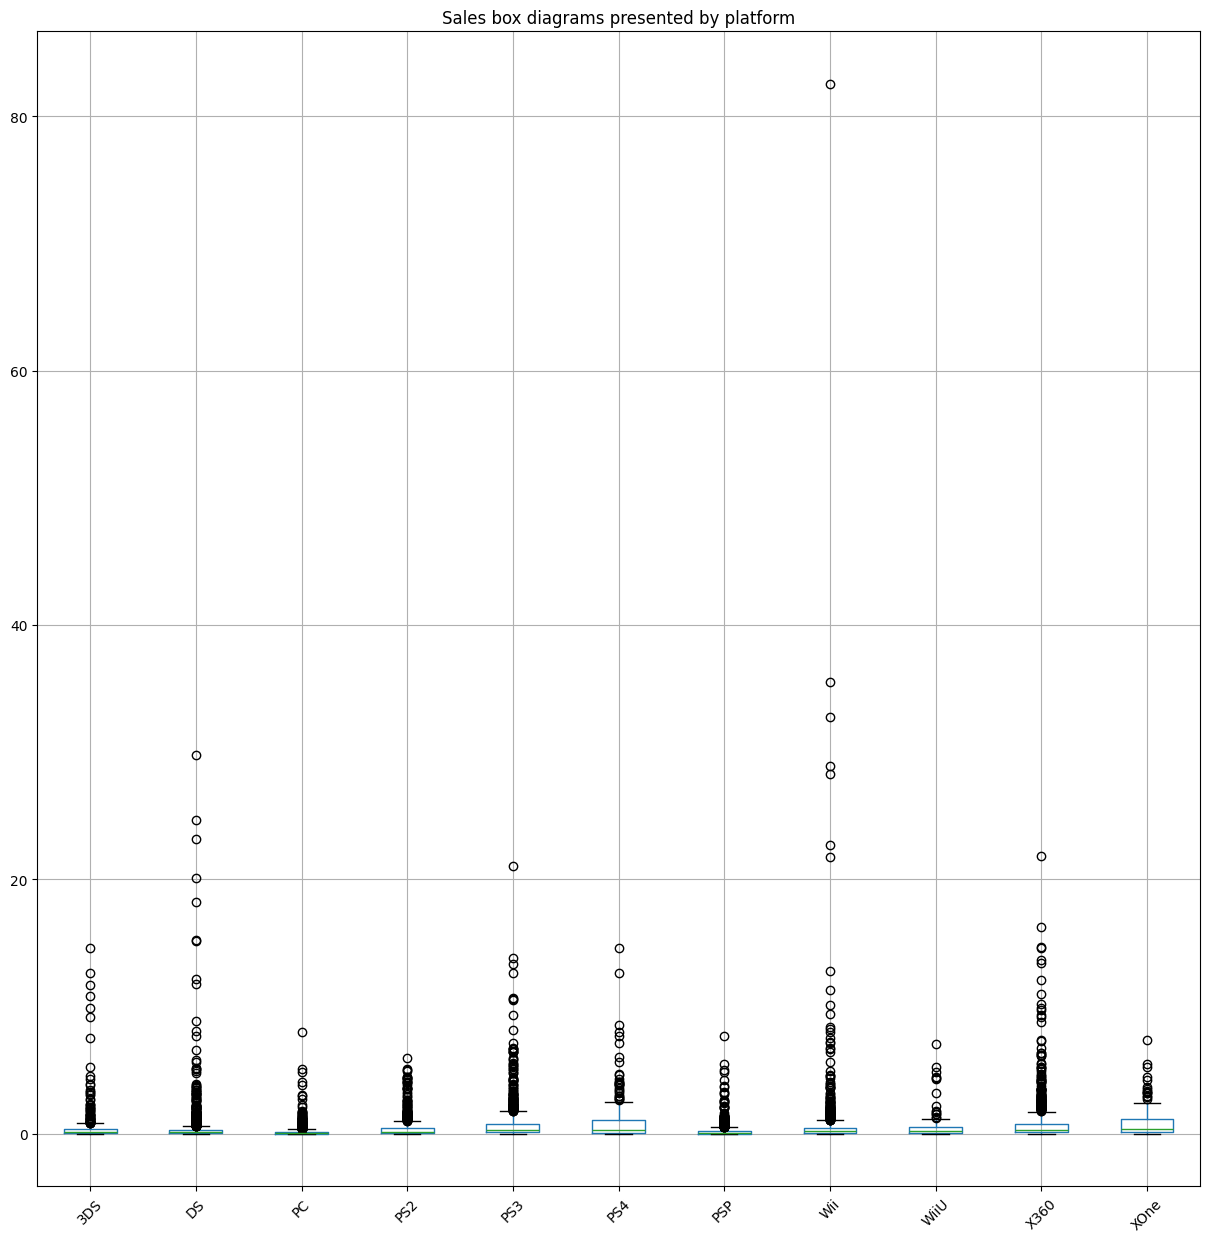

In [90]:
boxplot = sales_per_platform_per_game.boxplot(column = ['3DS', 'DS', 'PC', 'PS2', 'PS3', 'PS4', 'PSP', 'Wii',
 'WiiU', 'X360', 'XOne'], rot = 45, figsize = (15, 15))

plt.title('Sales box diagrams presented by platform')
plt.show()

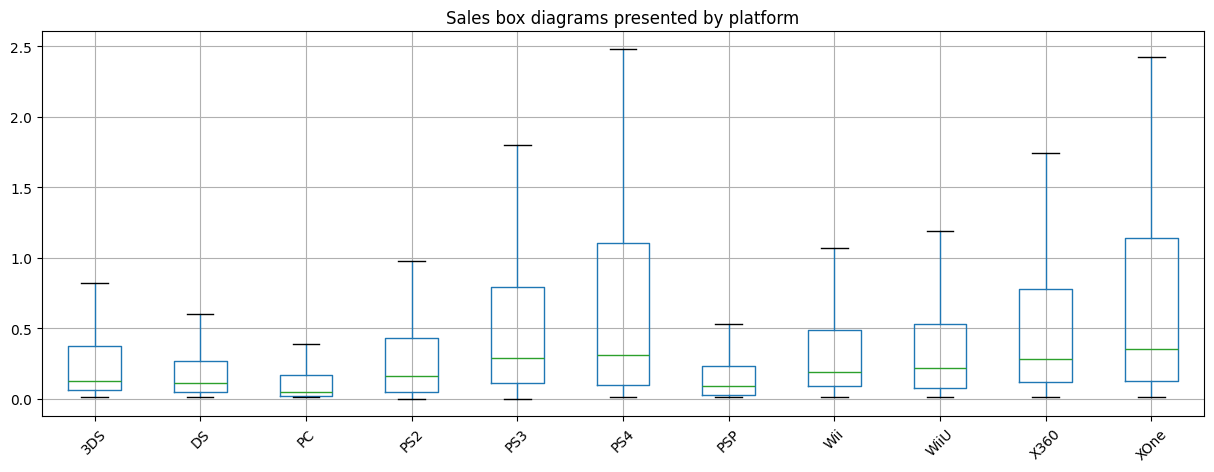

In [91]:
boxplot = sales_per_platform_per_game.boxplot(column = ['3DS', 'DS', 'PC', 'PS2', 'PS3', 'PS4', 'PSP', 'Wii',
 'WiiU', 'X360', 'XOne'], rot = 45, figsize = (15, 5), showfliers = False)

plt.title('Sales box diagrams presented by platform')
plt.show()

In [92]:
platforms_media = 0
for platform in sales_per_platform_per_game.keys().values[1:]:
  print(platform, 'mean:', sales_per_platform_per_game[platform].mean())
  platforms_media += sales_per_platform_per_game[platform].mean()

platforms_media /= 16

print('Mean of platform means:', platforms_media)

3DS mean: 0.5207510729613735
DC mean: 0.03
DS mean: 0.3745779685264664
GBA mean: 0.23633333333333337
GC mean: 0.2776595744680851
PC mean: 0.21418865435356202
PS2 mean: 0.40043192488262913
PS3 mean: 0.731219415943173
PS4 mean: 1.074078947368421
PSP mean: 0.2397877758913413
PSV mean: 0.14406976744186048
Wii mean: 0.6933852140077821
WiiU mean: 0.5833834586466166
X360 mean: 0.7867939244663383
XB mean: 0.24428571428571433
XOne mean: 0.8323124999999999
Mean of platform means: 0.4614537029110435


Para todas las plataformas, tienen una media muy baja comparada con lo alto que llegan las ventas de algunos juegos. En comparación visual, la media individual de las ventas totales por plataforma está regada entre las 0.2 y 0.9 millones de dólares americanos, con una media de 0.41.

Aun cuando su media de ventas  totales no es alta, algunas plataformas populares cuentan con juegos con ventas atípicas que se disparan más allá de los 10 millones de dólares. Estos juegos atípicos pueden ser explicados por juegos exclusivos de cierta plataforma o juegos increíblemente exitosos.

## Reseñas y ventas


In [93]:
#Plataforma de eleccion: xbox 360
df_x360 = df_modern_games[df_modern_games['platform'] == 'X360']
print(df_x360)

                                  name platform  year_of_release     genre  \
14                  Kinect Adventures!     X360             2010      Misc   
23                  Grand Theft Auto V     X360             2013    Action   
29      Call of Duty: Modern Warfare 3     X360             2011   Shooter   
32             Call of Duty: Black Ops     X360             2010   Shooter   
35          Call of Duty: Black Ops II     X360             2012   Shooter   
...                                ...      ...              ...       ...   
16613         Dragon Ball Z for Kinect     X360             2012  Fighting   
16622  World Snooker Championship 2007     X360             2007    Sports   
16647      Metal Gear Solid HD Edition     X360             2011    Action   
16654               Ben 10 Omniverse 2     X360             2013    Action   
16711                 LMA Manager 2007     X360             2006    Sports   

       na_sales  eu_sales  jp_sales  other_sales  critic_score 

In [94]:
def critic_score_group(score):
    if score < 60:
        return 'low'
    elif score < 80:
        return 'medium'
    elif score >= 80:
        return 'high'
    else:
        return 'no score'

def user_score_group(score):
    if score < 6:
        return 'low'
    elif score < 8:
        return 'medium'
    elif score >= 8:
        return 'high'
    else:
        return 'no score'

df_x360['critic_score_categorized'] = df_x360['critic_score'].apply(critic_score_group)
df_x360['user_score_categorized'] = df_x360['user_score'].apply(user_score_group)

print(df_x360[['critic_score_categorized', 'user_score_categorized']])

      critic_score_categorized user_score_categorized
14                      medium                 medium
23                        high                   high
29                        high                    low
32                        high                 medium
35                        high                    low
...                        ...                    ...
16613                      low                    low
16622                 no score               no score
16647                 no score               no score
16654                 no score                    low
16711                 no score               no score

[1219 rows x 2 columns]


/tmp/ipython-input-599480297.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x360['critic_score_categorized'] = df_x360['critic_score'].apply(critic_score_group)
/tmp/ipython-input-599480297.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x360['user_score_categorized'] = df_x360['user_score'].apply(user_score_group)


In [95]:
x360_total_sales = df_x360['total_sales'].sum()
print(df_x360.groupby('critic_score_categorized')['total_sales'].sum().sort_values(ascending = False) * 100 / x360_total_sales)
print('\n')
print(df_x360.groupby('critic_score_categorized')['total_sales'].mean())

critic_score_categorized
high        56.019464
medium      27.464260
no score    10.472846
low          6.043429
Name: total_sales, dtype: float64


critic_score_categorized
high        2.176640
low         0.252174
medium      0.632086
no score    0.309262
Name: total_sales, dtype: float64


In [96]:
print(df_x360.groupby('user_score_categorized')['total_sales'].sum().sort_values(ascending = False) * 100 / x360_total_sales)
print('\n')
print(df_x360.groupby('user_score_categorized')['total_sales'].mean())

user_score_categorized
medium      51.796357
high        24.063268
low         16.636102
no score     7.504272
Name: total_sales, dtype: float64


user_score_categorized
high        1.327241
low         0.657037
medium      0.954127
no score    0.256299
Name: total_sales, dtype: float64


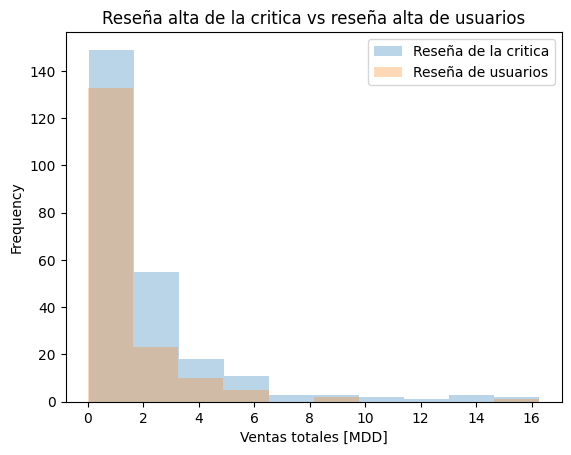

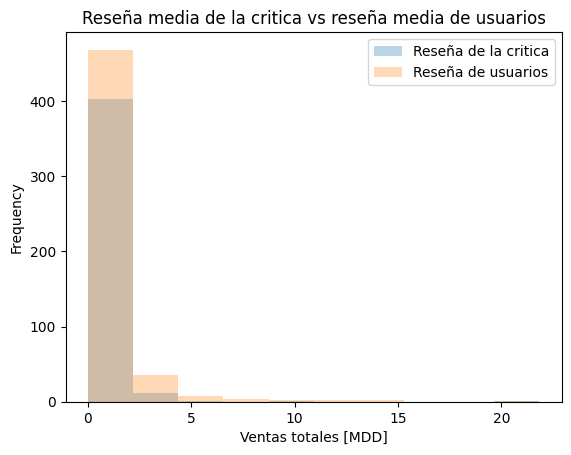

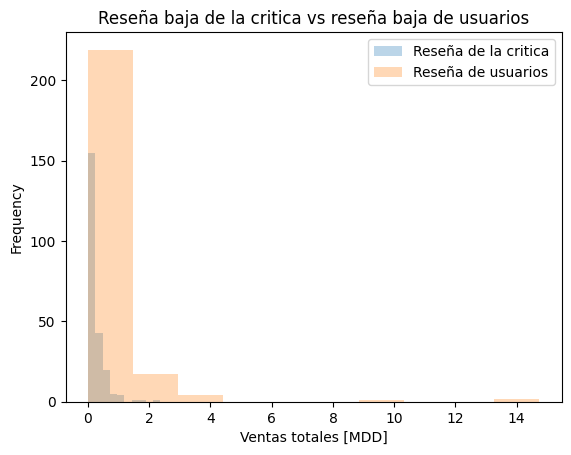

In [97]:
df_x360[df_x360['critic_score_categorized'] == 'high']['total_sales'].plot(kind = 'hist', alpha = 0.3)
df_x360[df_x360['user_score_categorized'] == 'high']['total_sales'].plot(kind = 'hist', alpha = 0.3)
plt.title('Reseña alta de la critica vs reseña alta de usuarios')
plt.xlabel('Ventas totales [MDD]')
plt.legend(['Reseña de la critica', 'Reseña de usuarios'])
plt.show()

df_x360[df_x360['critic_score_categorized'] == 'medium']['total_sales'].plot(kind = 'hist', alpha = 0.3)
df_x360[df_x360['user_score_categorized'] == 'medium']['total_sales'].plot(kind = 'hist', alpha = 0.3)
plt.title('Reseña media de la critica vs reseña media de usuarios')
plt.xlabel('Ventas totales [MDD]')
plt.legend(['Reseña de la critica', 'Reseña de usuarios'])
plt.show()

df_x360[df_x360['critic_score_categorized'] == 'low']['total_sales'].plot(kind = 'hist', alpha = 0.3)
df_x360[df_x360['user_score_categorized'] == 'low']['total_sales'].plot(kind = 'hist', alpha = 0.3)
plt.title('Reseña baja de la critica vs reseña baja de usuarios')
plt.xlabel('Ventas totales [MDD]')
plt.legend(['Reseña de la critica', 'Reseña de usuarios'])
plt.show()

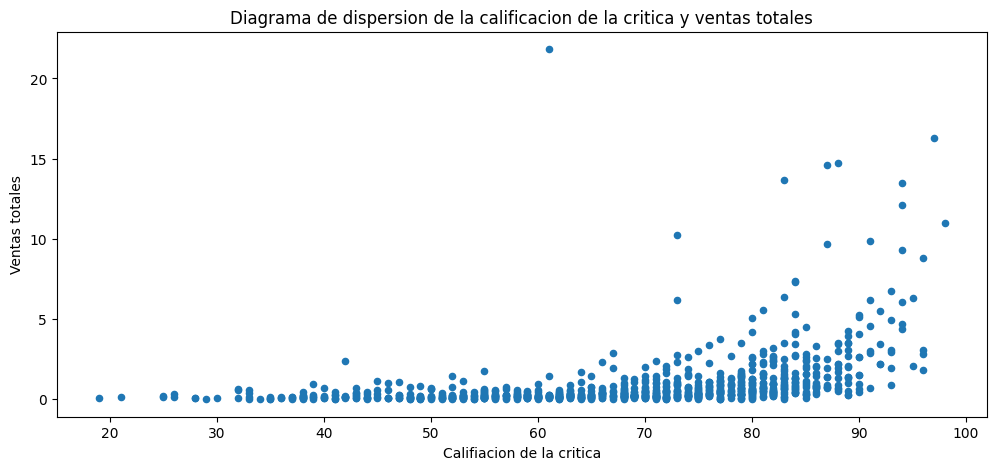

Correlacion entre la reseña de la critica y las ventas totales: 0.39286589254006965

 



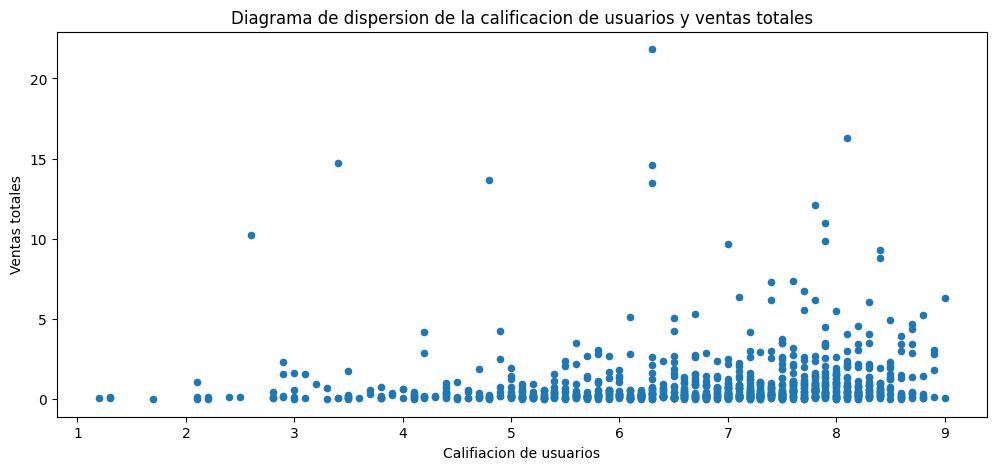

Correlacion entre la reseña de la critica y las ventas totales: 0.11124535675258383


In [98]:
df_x360.plot(kind = 'scatter', x = 'critic_score', y = 'total_sales', figsize = (12, 5))
plt.xlabel('Califiacion de la critica')
plt.ylabel('Ventas totales')
plt.title('Diagrama de dispersion de la calificacion de la critica y ventas totales')
plt.show()
print('Correlacion entre la reseña de la critica y las ventas totales:', df_x360['critic_score'].corr(df_x360['total_sales']))
print('\n \n')

df_x360.plot(kind = 'scatter', x = 'user_score', y = 'total_sales', figsize = (12, 5))
plt.xlabel('Califiacion de usuarios')
plt.ylabel('Ventas totales')
plt.title('Diagrama de dispersion de la calificacion de usuarios y ventas totales')
plt.show()
print('Correlacion entre la reseña de la critica y las ventas totales:', df_x360['user_score'].corr(df_x360['total_sales']))

Existe una diferencia clara con la relación presente entre las ventas totales de los juegos y las reseñas de la crítica o los usuarios.

Las reseñas de la crítica son congruentes con las ventas totales. Mientras más alta es la calificación otorgada por la crítica, más ventas totales alcanzan cierto título. En el dataset de estudio, el porcentaje de mercado que le corresponde a juegos cuya rea es igual o mayor a 80 es del 55%. La correlación entre estas dos variables: las ventas totales y la reseña es de 0.39.

Por otro lado, observando las reseñas otorgadas por usuarios, el comportamiento es muy diferente. A primera instancia, el porcentaje de mercado con mayor peso corresponde a juegos con una calificación media (mayor que 6 y menor que 8) con un 51%. La correlación calculada es de 0.11. Contrastando los gráficos vemos que hay juegos que obtienen buenas ventas totales, aun cuando la calificación dada por los usuarios no es tan alta.

## Ventas de juegos en diferentes plataformas


In [99]:
# se presentan los juegos que estan en otras plataformas y se escogen 6
print(df_modern_games[df_modern_games['name'].duplicated()].sort_values('total_sales', ascending = False)['name'].head(15))

23                 Grand Theft Auto V
35         Call of Duty: Black Ops II
37     Call of Duty: Modern Warfare 3
41            Call of Duty: Black Ops
42                 Grand Theft Auto V
55     Call of Duty: Modern Warfare 2
57                Grand Theft Auto IV
69               Call of Duty: Ghosts
99          Call of Duty: Black Ops 3
104                     Battlefield 3
120    Call of Duty 4: Modern Warfare
130       The Elder Scrolls V: Skyrim
135               Red Dead Redemption
165                Grand Theft Auto V
170        Call of Duty: World at War
Name: name, dtype: object


In [100]:
# games_to_compare contiene los 6 juegos seleccionados
games_to_comapre = ['Grand Theft Auto V', 'Call of Duty: Black Ops II', 'Call of Duty: Modern Warfare 3',
                    'Call of Duty: Black Ops', 'Call of Duty: Modern Warfare 2', 'Grand Theft Auto IV']

compare_sales_platforms = df_modern_games[df_modern_games['name'].isin(games_to_comapre)]

#se descartan ventas de Wii, DS y WiiU
compare_sales_platforms = compare_sales_platforms.drop([1412, 2500, 3439, 4706])

print(compare_sales_platforms[['name', 'platform', 'total_sales']])

                                name platform  total_sales
16                Grand Theft Auto V      PS3        21.05
23                Grand Theft Auto V     X360        16.27
29    Call of Duty: Modern Warfare 3     X360        14.73
32           Call of Duty: Black Ops     X360        14.62
34        Call of Duty: Black Ops II      PS3        13.79
35        Call of Duty: Black Ops II     X360        13.68
36    Call of Duty: Modern Warfare 2     X360        13.47
37    Call of Duty: Modern Warfare 3      PS3        13.33
41           Call of Duty: Black Ops      PS3        12.63
42                Grand Theft Auto V      PS4        12.62
51               Grand Theft Auto IV     X360        11.00
55    Call of Duty: Modern Warfare 2      PS3        10.61
57               Grand Theft Auto IV      PS3        10.50
165               Grand Theft Auto V     XOne         5.47
1040  Call of Duty: Modern Warfare 3       PC         1.71
1227      Call of Duty: Black Ops II       PC         1.

platform                            name    PC    PS3    PS4   X360  XOne
0                Call of Duty: Black Ops   NaN  12.63    NaN  14.62   NaN
1             Call of Duty: Black Ops II  1.52  13.79    NaN  13.68   NaN
2         Call of Duty: Modern Warfare 2  0.89  10.61    NaN  13.47   NaN
3         Call of Duty: Modern Warfare 3  1.71  13.33    NaN  14.73   NaN
4                    Grand Theft Auto IV  0.87  10.50    NaN  11.00   NaN
5                     Grand Theft Auto V  1.17  21.05  12.62  16.27  5.47


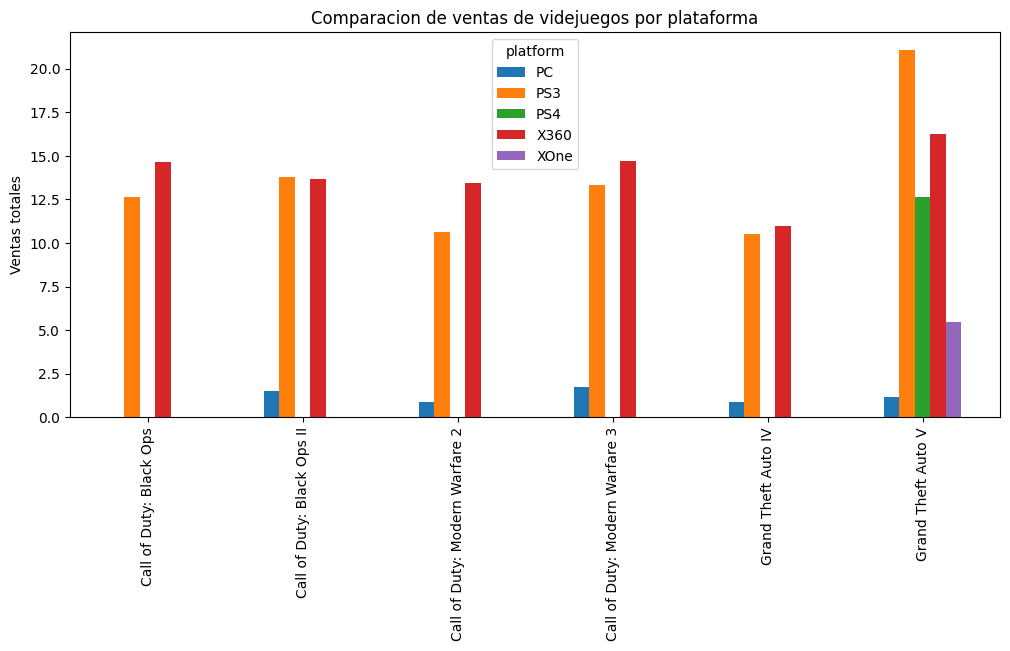

In [101]:
print(compare_sales_platforms.pivot_table(index = 'name',
                                          columns = 'platform',
                                          values = 'total_sales').reset_index())

compare_sales_platforms.pivot_table(index = 'name',
                                          columns = 'platform',
                                          values = 'total_sales').reset_index().plot(x = 'name', y = ['PC', 'PS3', 'PS4', 'X360', 'XOne'], kind = 'bar', figsize = (12, 5))
plt.ylabel('Ventas totales')
plt.xlabel('')
plt.title('Comparacion de ventas de videjuegos por plataforma')
plt.show()

En la mayoría de los juegos que se compararon las ventas con respecto a las diferentes plataformas, vemos que Xbox 360 lidera el mercado, seguido muy de cerca por la PS3 y con muy poca presencia esta también PC, hasta el último juego (el más reciente), 'Grand Theft Auto V',  Xbox 360 es superado por la PS3 y aparecen las consolas PS4 y Xbox One

## Analisis sobre el genero de los juegos

In [102]:
agg_dict = {
    'name': 'nunique',
    'total_sales': 'sum'
}

genre_and_sales = df_modern_games.groupby('genre').agg(agg_dict).reset_index()
genre_and_sales.columns = ['genre', 'number_of_titles', 'total_sales']
genre_and_sales['avg_income_per_title'] = genre_and_sales['total_sales'] / genre_and_sales['number_of_titles']
print(genre_and_sales.sort_values(by = 'avg_income_per_title', ascending = False))

           genre  number_of_titles  total_sales  avg_income_per_title
8        Shooter               449       720.34              1.604321
4       Platform               242       299.83              1.238967
10        Sports               690       829.85              1.202681
6         Racing               324       352.24              1.087160
0         Action              1295      1171.93              0.904965
2       Fighting               292       203.60              0.697260
7   Role-Playing               818       532.60              0.651100
3           Misc              1007       613.23              0.608967
9     Simulation               518       267.73              0.516853
5         Puzzle               345       110.27              0.319623
11      Strategy               346        77.29              0.223382
1      Adventure               815       145.99              0.179129


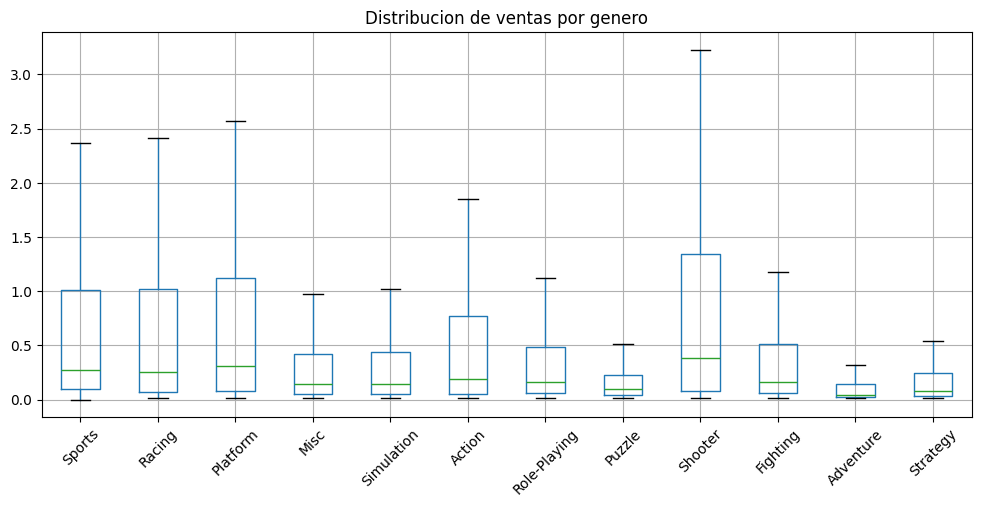

In [124]:
genre_distribution = df_modern_games.pivot_table(
    index = 'name',
    columns = 'genre',
    values = 'total_sales',
    aggfunc = 'sum'
)
genres = []
for genre in df_modern_games['genre'].unique():
  genres.append(genre)

boxplot = genre_distribution.boxplot(column = genres, rot = 45, figsize=(12, 5), showfliers = False)
plt.title('Distribucion de ventas por genero')
plt.show()

Entre los géneros más rentables encontramos: los de shooters, plataforma, racing y sports. Mientras que el promedio de la venta total de los géneros, es comparativamente similar, la distribución de estos géneros previamente mencionados se extiende más, permitiendo un rango mayor de ventas totales. Para los géneros con ventas más bajas se listaron los de puzzle, strategy y adventure.

Es muy interesante cómo el género de adventure tiene el mayor número de títulos, pero, sin embargo, de los promedios más bajos en ventas

# Parte 4. Perfil de usuario para cada region


## Las cinco plataformas principales.

In [104]:
print('Las cinco platafromas principales de Norteamerica:\n',
      df_modern_games.groupby('platform')['na_sales'].sum().sort_values(ascending = False).head(5))

print('\nLas cinco platafromas principales de Europa:\n',
      df_modern_games.groupby('platform')['eu_sales'].sum().sort_values(ascending = False).head(5))

print('\nLas cinco platafromas principales de Japon:\n',
      df_modern_games.groupby('platform')['jp_sales'].sum().sort_values(ascending = False).head(5))

Las cinco platafromas principales de Norteamerica:
 platform
X360    595.05
Wii     486.81
PS3     389.46
DS      371.98
PS2     200.49
Name: na_sales, dtype: float64

Las cinco platafromas principales de Europa:
 platform
PS3     325.95
X360    267.61
Wii     258.21
DS      184.48
PS4     109.31
Name: eu_sales, dtype: float64

Las cinco platafromas principales de Japon:
 platform
DS     171.35
3DS     92.59
PS3     78.11
PSP     73.85
Wii     68.28
Name: jp_sales, dtype: float64


In [105]:
na_total_sales = df_modern_games['na_sales'].sum()
print('Ventas totales generadas en Norteamerica:', na_total_sales)

eu_total_sales = df_modern_games['eu_sales'].sum()
print('Ventas totales generadas en Europa:', eu_total_sales)

jp_total_sales = df_modern_games['jp_sales'].sum()
print('Ventas totales generadas en Japon:', jp_total_sales)

Ventas totales generadas en Norteamerica: 2583.89
Ventas totales generadas en Europa: 1565.8899999999999
Ventas totales generadas en Japon: 596.27


In [106]:
print('Cuotas de mercado para las cinco platafromas principales de Norteamerica:\n',
      df_modern_games.groupby('platform')['na_sales'].sum().sort_values(ascending = False).head(5) / na_total_sales * 100)

print('\nCuotas de mercado para las cinco platafromas principales de Europa:\n',
      df_modern_games.groupby('platform')['eu_sales'].sum().sort_values(ascending = False).head(5) / eu_total_sales * 100)

print('\nCuotas de mercado para las cinco platafromas principales de Japon:\n',
      df_modern_games.groupby('platform')['jp_sales'].sum().sort_values(ascending = False).head(5) / jp_total_sales * 100)

Cuotas de mercado para las cinco platafromas principales de Norteamerica:
 platform
X360    23.029231
Wii     18.840198
PS3     15.072623
DS      14.396124
PS2      7.759231
Name: na_sales, dtype: float64

Cuotas de mercado para las cinco platafromas principales de Europa:
 platform
PS3     20.815638
X360    17.089962
Wii     16.489664
DS      11.781160
PS4      6.980695
Name: eu_sales, dtype: float64

Cuotas de mercado para las cinco platafromas principales de Japon:
 platform
DS     28.736982
3DS    15.528200
PS3    13.099770
PSP    12.385329
Wii    11.451188
Name: jp_sales, dtype: float64


In [107]:
print('Porcentaje de cuota del mercado que ocupan las 5 platafromas mas populares de Norteamerica:',
      (df_modern_games.groupby('platform')['na_sales'].sum().sort_values(ascending = False).head(5) / na_total_sales * 100).sum())

print('Porcentaje de cuota del mercado que ocupan las 5 platafromas mas populares de Europa:',
      (df_modern_games.groupby('platform')['eu_sales'].sum().sort_values(ascending = False).head(5) / eu_total_sales * 100).sum())

print('Porcentaje de cuota del mercado que ocupan las 5 platafromas mas populares de Japon:',
      (df_modern_games.groupby('platform')['jp_sales'].sum().sort_values(ascending = False).head(5) / jp_total_sales * 100).sum())

Porcentaje de cuota del mercado que ocupan las 5 platafromas mas populares de Norteamerica: 79.09740739737371
Porcentaje de cuota del mercado que ocupan las 5 platafromas mas populares de Europa: 73.1571183161014
Porcentaje de cuota del mercado que ocupan las 5 platafromas mas populares de Japon: 81.20146913311083


En las tres regiones, Norteamérica, Europa y Japón,  de las 5 plataformas principales comparten 3 plataformas, Wii, PS3 y DS; podemos observar X Box 360 en Norteamérica y Europa, pero no figura dentro del top 5 de Japón.

Es importante mencionar que la cuota de mercado que ocupan las respectivas 5 plataformas principales en su región es de más del 70 %. En el caso específico de Japón y Norteamérica, la cuota de mercado es del 80% en solo 5 plataformas.


## Generos principales por region


In [108]:
print('Los cinco generos principales de Norteamerica:\n',
      df_modern_games.groupby('genre')['na_sales'].sum().sort_values(ascending = False).head(5))

print('\nLos cinco generos principales de Europa:\n',
      df_modern_games.groupby('genre')['eu_sales'].sum().sort_values(ascending = False).head(5))

print('\nLos cinco generos principales de Japon:\n',
      df_modern_games.groupby('genre')['jp_sales'].sum().sort_values(ascending = False).head(5))

Los cinco generos principales de Norteamerica:
 genre
Action          570.75
Sports          425.16
Shooter         384.72
Misc            311.06
Role-Playing    205.96
Name: na_sales, dtype: float64

Los cinco generos principales de Europa:
 genre
Action     361.90
Sports     253.60
Shooter    232.17
Misc       166.43
Racing     127.28
Name: eu_sales, dtype: float64

Los cinco generos principales de Japon:
 genre
Role-Playing    172.99
Action          101.32
Misc             71.45
Sports           51.59
Platform         36.21
Name: jp_sales, dtype: float64


In [126]:
print('Cuotas de mercado para los cinco generos principales de Norteamerica:\n',
      df_modern_games.groupby('genre')['na_sales'].sum().sort_values(ascending = False).head(5) / na_total_sales * 100)

print('\nCuotas de mercado para los cinco generos principales de Europa:\n',
      df_modern_games.groupby('genre')['eu_sales'].sum().sort_values(ascending = False).head(5) / eu_total_sales * 100)

print('\nCuotas de mercado para los cinco generos principales de Japon:\n',
      df_modern_games.groupby('genre')['jp_sales'].sum().sort_values(ascending = False).head(5) / jp_total_sales * 100)

Cuotas de mercado para los cinco generos principales de Norteamerica:
 genre
Action          22.088789
Sports          16.454261
Shooter         14.889179
Misc            12.038438
Role-Playing     7.970928
Name: na_sales, dtype: float64

Cuotas de mercado para los cinco generos principales de Europa:
 genre
Action     23.111457
Sports     16.195263
Shooter    14.826712
Misc       10.628460
Racing      8.128285
Name: eu_sales, dtype: float64

Cuotas de mercado para los cinco generos principales de Japon:
 genre
Role-Playing    29.012025
Action          16.992302
Misc            11.982827
Sports           8.652121
Platform         6.072752
Name: jp_sales, dtype: float64


In [110]:
print('Porcentaje de cuota del mercado que ocupan los 5 generos mas populares de Norteamerica:',
      (df_modern_games.groupby('genre')['na_sales'].sum().sort_values(ascending = False).head(5) / na_total_sales * 100).sum())

print('Porcentaje de cuota del mercado que ocupan los 5 generos mas populares de Europa:',
      (df_modern_games.groupby('genre')['eu_sales'].sum().sort_values(ascending = False).head(5) / eu_total_sales * 100).sum())

print('Porcentaje de cuota del mercado que ocupan los 5 genros mas populares de Japon:',
      (df_modern_games.groupby('genre')['jp_sales'].sum().sort_values(ascending = False).head(5) / jp_total_sales * 100).sum())

Porcentaje de cuota del mercado que ocupan los 5 generos mas populares de Norteamerica: 73.4415938759003
Porcentaje de cuota del mercado que ocupan los 5 generos mas populares de Europa: 72.89017747095902
Porcentaje de cuota del mercado que ocupan los 5 genros mas populares de Japon: 72.71202643097926


Norteamérica y Europa cuentan con casi el mismo comportamiento en la relación entre los géneros de videojuegos y sus ventas. Sus 4 géneros principales son los mismos, en el mismo orden y la misma cuota de mercado.

Japón, por otro lado, dista en sus 5 juegos más populares, con el 30% de la cuota de mercado, aparece Role-Playing, género que no figura en las otras dos regiones.

En las tres regiones, sus respectivos 5 géneros más populares cubren cerca de tres cuartas partes de sus cuotas de mercado.

## Clasificaciones de ESRB y ventas

In [111]:
agg_dict = {
    'name': 'nunique',
    'na_sales': 'sum',
    'eu_sales': 'sum',
    'jp_sales': 'sum',
    'total_sales': 'sum'
}

rating_vs_sales = df_modern_games.groupby('rating').agg(agg_dict).reset_index()
rating_vs_sales.columns = (['rating', 'number_of_titles', 'na_sales', 'eu_sales', 'jp_sales', 'total_sales'])
rating_vs_sales['avg_sales_per_title'] = rating_vs_sales['total_sales'] / rating_vs_sales['number_of_titles']

print(rating_vs_sales.sort_values(by = 'avg_sales_per_title', ascending = False))

  rating  number_of_titles  na_sales  eu_sales  jp_sales  total_sales  \
0     AO                 1      1.26      0.61      0.00         1.96   
4      M               619    591.67    397.57     45.03      1175.49   
1      E              1725    865.13    495.10    146.26      1680.20   
2   E10+               753    339.21    178.11     38.60       626.23   
6      T              1205    470.13    248.38     89.05       919.82   
3     EC                 5      1.53      0.11      0.00         1.75   
5     RP                 1      0.00      0.03      0.00         0.04   

   avg_sales_per_title  
0             1.960000  
4             1.899015  
1             0.974029  
2             0.831647  
6             0.763336  
3             0.350000  
5             0.040000  


Para el lapso de tiempo de interés, las ventas en función de las clasificaciones de ESRB siguen el mismo patrón a través de las tres regiones y, aunque la clasificación E es quien reporta el número más alto de ventas totales, también es la clasificación con más títulos registrados.

En cuanto al promedio de ventas por título se refiere, la clasificación M lidera el primer puesto, seguido por las clasificaciones E, E10+ y T. Importante resaltar que la clasificación M tiene un promedio de venta por título casi dos veces mayor al segundo lugar, E.

# Paso 5. Prueba de hipotesis

##  Calificaciones promedio de los usuarios para las plataformas Xbox One y PC.

In [112]:
df_XOne = df_modern_games[df_modern_games['platform'] == 'XOne']

df_PC = df_modern_games[df_modern_games['platform'] == 'PC']

print(df_XOne[['name', 'user_score']])
print(df_PC[['name', 'user_score']])

                                            name  user_score
99                     Call of Duty: Black Ops 3         NaN
165                           Grand Theft Auto V         7.9
179               Call of Duty: Advanced Warfare         5.4
242                            Halo 5: Guardians         6.4
270                                    Fallout 4         6.2
...                                          ...         ...
16124        WRC 5: FIA World Rally Championship         NaN
16175                                Psycho-Pass         NaN
16533                        Rugby League Live 3         7.1
16595  Rabbids Invasion: The Interactive TV Show         NaN
16597                Saints Row: Gat out of Hell         6.0

[160 rows x 2 columns]
                                         name  user_score
85                                 The Sims 3         7.6
192                                Diablo III         4.0
218            StarCraft II: Wings of Liberty         8.2
288    World

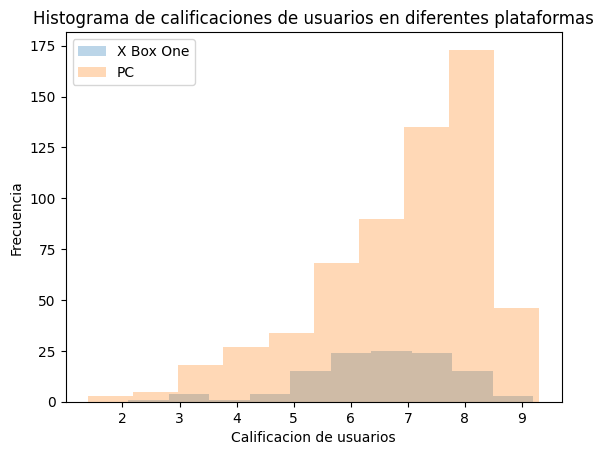

In [113]:
df_XOne['user_score'].plot(kind = 'hist', alpha = 0.3, label = 'X Box One')
df_PC['user_score'].plot(kind = 'hist', alpha = 0.3, label = 'PC')

plt.legend()
plt.ylabel('Frecuencia')
plt.xlabel('Calificacion de usuarios')
plt.title('Histograma de calificaciones de usuarios en diferentes plataformas')
plt.show()

Media de califiaciones de usuarios de X Box One: 6.477586206896552
media de calificaciones de usuarios de PC: 6.929048414023372


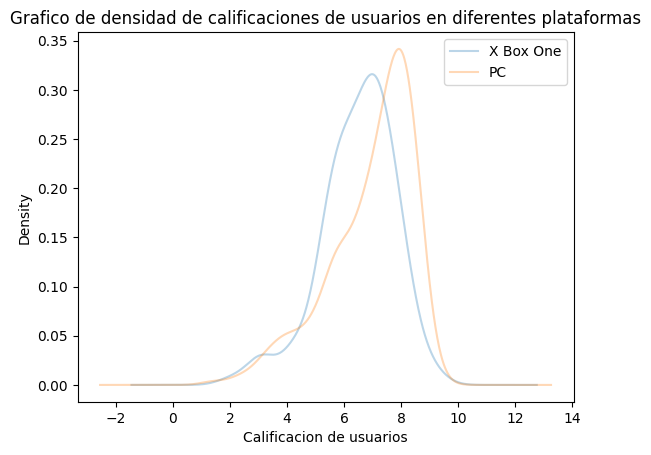

In [121]:
df_XOne['user_score'].plot(kind = 'density', alpha = 0.3, label = 'X Box One')
print('Media de califiaciones de usuarios de X Box One:', df_XOne['user_score'].mean())
df_PC['user_score'].plot(kind = 'density', alpha = 0.3, label = 'PC')
print('media de calificaciones de usuarios de PC:', df_PC['user_score'].mean())

plt.legend()
plt.xlabel('Calificacion de usuarios')
plt.title('Grafico de densidad de calificaciones de usuarios en diferentes plataformas')
plt.show()

En este caso, estamos comparando la igualdad de dos poblaciones, la calificación de usuarios de X Box One y la calificación de los usuarios de PC.

Nuestra hipótesis nula, H_0, asume que ambas poblaciones son iguales.
La hipótesis alterna, H_1, asume que son distintas.

In [115]:
sample_1 = df_XOne['user_score']
sample_2 = df_PC['user_score']

alpha = 0.05 # el nivel de significancia estadística crítica

results = st.ttest_ind(sample_1, sample_2, equal_var = True, nan_policy = 'omit')

print('Valor p:', results.pvalue)

if results.pvalue < alpha:
  print('Rechazamos la hipotesis nula')
else:
  print('No podemos rechazar la hipotesis nula')


Valor p: 0.0023742802474829073
Rechazamos la hipotesis nula


##  Calificaciones promedio de los usuarios para los géneros de Acción y Deportes.

In [116]:
df_action = df_modern_games[df_modern_games['genre'] == 'Action']
print(df_action[['name', 'user_score']])

df_sports = df_modern_games[df_modern_games['genre'] == 'Sports']
print(df_sports[['name', 'user_score']])

                                                    name  user_score
16                                    Grand Theft Auto V         8.2
23                                    Grand Theft Auto V         8.1
42                                    Grand Theft Auto V         8.3
46                  Pokemon HeartGold/Pokemon SoulSilver         NaN
51                                   Grand Theft Auto IV         7.9
...                                                  ...         ...
16662                Hakuoki: Reimeiroku - Omouhase Kara         NaN
16668  Fujiko F. Fujio Characters: Great Assembly! Sl...         NaN
16674                      Tsukigime Ranko's Longest Day         NaN
16675      Original Frisbee Disc Sports: Ultimate & Golf         NaN
16692                  Metal Gear Solid V: Ground Zeroes         7.6

[2396 rows x 2 columns]
                                   name  user_score
0                            Wii Sports         8.0
3                     Wii Sports Resort    

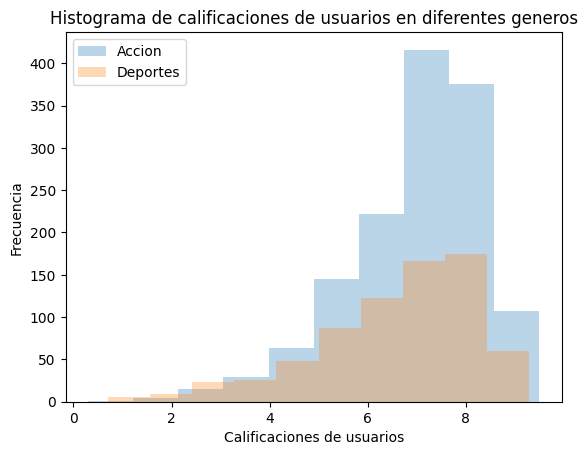

In [117]:
df_action['user_score'].plot(kind = 'hist', alpha = 0.3, label = 'Accion')
df_sports['user_score'].plot(kind = 'hist', alpha = 0.3, label = 'Deportes')

plt.legend()
plt.xlabel('Calificaciones de usuarios')
plt.ylabel('Frecuencia')
plt.title('Histograma de calificaciones de usuarios en diferentes generos')
plt.show()

Media de califiacion de usuarios para categoria Accion: 6.966037735849057
Media de califiacion de usuarios para categoria Deoprtes: 6.596388888888888


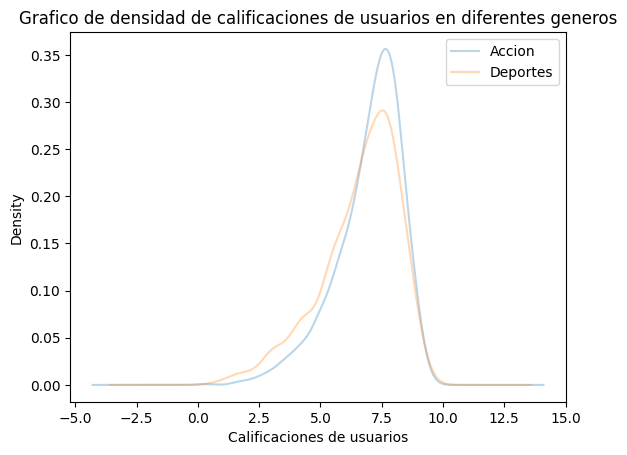

In [122]:
df_action['user_score'].plot(kind = 'density', alpha = 0.3, label = 'Accion')
print('Media de califiacion de usuarios para categoria Accion:', df_action['user_score'].mean())
df_sports['user_score'].plot(kind = 'density', alpha = 0.3, label = 'Deportes')
print('Media de califiacion de usuarios para categoria Deoprtes:', df_sports['user_score'].mean())

plt.legend()
plt.xlabel('Calificaciones de usuarios')
plt.title('Grafico de densidad de calificaciones de usuarios en diferentes generos')
plt.show()

Nuevamente, vamos a usar un test de hipótesis de doble cola, donde vamos a comparar la igualdad de dos poblaciones, calificaciones de usuarios del género de acción y calificaciones de usuarios del género de deportes.

Hipótesis nula, H_0, las poblaciones son iguales.

Hipótesis alterna, H_1, las poblaciones son distintas.

In [119]:
sample_1 = df_XOne['user_score']
sample_2 = df_PC['user_score']

alpha = 0.05 # el nivel de significancia estadística crítica

results = st.ttest_ind(sample_1, sample_2, equal_var = True, nan_policy = 'omit')

print('Valor p:', results.pvalue)

if results.pvalue < alpha:
  print('Rechazamos la hipotesis nula')
else:
  print('No podemos rechazar la hipotesis nula')

Valor p: 0.0023742802474829073
Rechazamos la hipotesis nula


Contamos con gráficos de densidad y medias muy parecidas en ambos pares de test de hipótesis, sin embargo, obtenemos un valor-p extremadamente pequeño para ambos pares, lo que nos hace rechazar la hipótesis nula, hipótesis que asumía que cada par de poblaciones a comparar es estadísticamente similar dentro del nivel de significancia estadística crítica de 0.05.

# Parte 6. Conclusion general

En resumen:


* A lo largo del análisis, se observa la tendencia de relevancia de plataformas de un promedio de 10 a 11 años, las plataformas líderes en el dataset de estudios se encuentran próximas a terminar su ciclo de relevancia, y según los datos, dos nuevas plataformas aparecen con un buen prospecto, Xbox One y PlayStation 4.

* Se presentó que las calificaciones de la crítica, son más congruentes con las ventas, es decir, mientras más alta es la calificación otorgada por la crítica, más alta es la venta de cierto título.

* Recientemente, PlayStation 3 está alcanzando mejores ventas para el mismo título que su homólogo directo, Xbox 360.

* Norteamérica y Europa tienen un comportamiento similar en sus 5 plataformas más populares y 5 géneros más populares, mientras que Japón tiene una discrepancia significativa para sus 5 plataformas más populares y sus 5 géneros más populares.

Con estos puntos clave en consideración, mi recomendación sería hacer dos campanas de marketing distintas según la región. La primera se beneficia de la similitud que existe entre Norteamérica y Europa para así compartir la misma campana publicitaria. Y la segunda campana publicitaria enfocada en el comportamiento del mercado en dicha región.

Para la campana publicitaria conjunta de Europa y Norteamérica, sugiero priorizar los juegos con buenas calificaciones de la crítica,  que se encuentren dentro de las categorías de acción, deportes y shooter.

En la campana publicitaria para Japón se puede aprovechar el gusto que existe por las plataformas de la marca Nintendo y PlayStation, también persiguiendo los juegos con mejores calificaciones por la crítica y que pertenezcan a las categorías: Role-Playing, acción y misc.